<a href="https://colab.research.google.com/github/Anshul-tembhare/spark/blob/master/FstAIwebp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
!pip install nbconvert

     |████████████████████████████████| 727kB 6.1MB/s 
     |████████████████████████████████| 194kB 17.3MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 1.1MB 13.7MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 


In [2]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
fns = get_image_files('/content/gdrive/MyDrive/Projects/DB_COVID/train')
fns

(#100) [Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject63.jpg'),Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject1,1.jpg'),Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject15.jpg'),Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject11.jpg'),Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject2.jpg'),Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject8.jpg'),Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject3.jpg'),Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject25.jpg'),Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject30.1.jpg'),Path('/content/gdrive/MyDrive/Projects/DB_COVID/train/COVID/COVID_Subject61.jpg')...]

In [5]:
xrays = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [6]:
dls = xrays.dataloaders('/content/gdrive/MyDrive/Projects/DB_COVID/train')

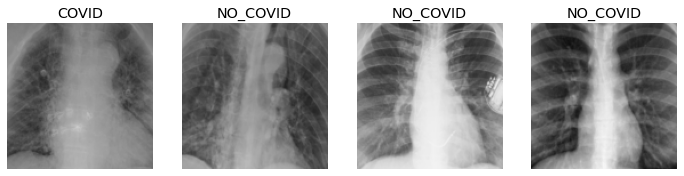

In [7]:
dls.valid.show_batch(max_n = 4, nrows = 1)

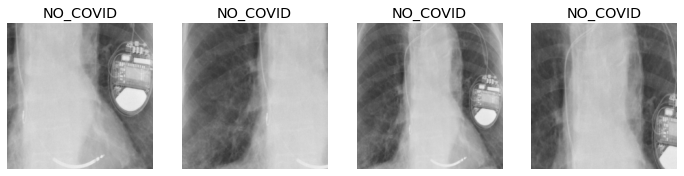

In [8]:
xrays = xrays.new(item_tfms=RandomResizedCrop(224 , min_scale=0.3))
dls = xrays.dataloaders('/content/gdrive/MyDrive/Projects/DB_COVID/train')
dls.train.show_batch(max_n = 4, nrows = 1, unique = True)

In [9]:
#TRAINING THE MODEL
xrays = xrays.new(
    item_tfms = RandomResizedCrop(224 , min_scale= 0.5),
    batch_tfms = aug_transforms())
dls = xrays.dataloaders('/content/gdrive/MyDrive/Projects/DB_COVID/train')

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(7)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.697679,3.815952,0.550000,00:41


epoch,train_loss,valid_loss,error_rate,time
0,1.259743,3.825052,0.550000,00:37
1,1.217452,3.768283,0.550000,00:36
2,1.264229,3.620538,0.550000,00:37
3,1.171369,3.038996,0.550000,00:37
4,1.123113,2.619992,0.550000,00:37
5,1.081873,2.433591,0.550000,00:40
6,1.040923,2.296021,0.550000,00:37


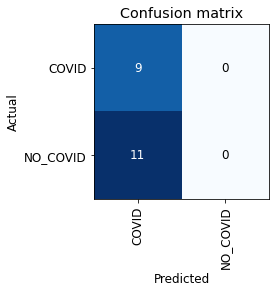

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

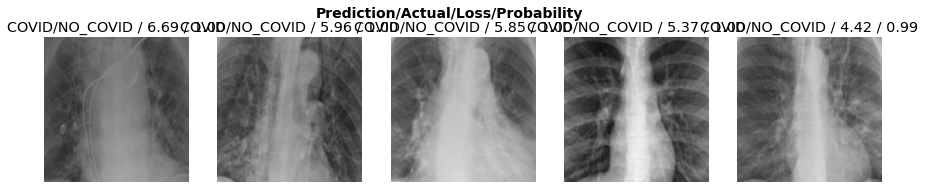

In [12]:
interp.plot_top_losses(5, nrows=1)

In [13]:
learn.export()

In [14]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [15]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('/content/gdrive/MyDrive/Projects/DB_COVID/test/COVID/COVID_Subject64.jpg')

('COVID', tensor(0), tensor([0.9865, 0.0135]))

In [16]:
learn_inf.predict('/content/gdrive/MyDrive/Projects/DB_COVID/test/NO_COVID/NO_COVID_Subject100.jpg')

('COVID', tensor(0), tensor([0.9520, 0.0480]))

In [17]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [18]:
btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/Projects/DB_COVID/test/COVID/COVID_Subject64.jpg'])

In [19]:
img = PILImage.create(btn_upload.data[-1])

In [20]:
out_pl = widgets.Output()
out_pl.clear_output()
out_pl

Output()

In [ ]:
#USE ONLY WHEN TO DISPLAY PIC IN VBOX
with out_pl: display(img.to_thumb(224,224))

In [21]:
pred,pred_idx,probs = learn_inf.predict(img)

In [22]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: COVID; Probability: 0.9865')

In [23]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [24]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [25]:
btn_upload = widgets.FileUpload()

In [26]:
VBox([widgets.Label('COVID/NON-COVID'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [27]:
#INSTALLING VOILA TO CREATE WEB APP
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.9MB 4.3MB/s 
     |████████████████████████████████| 552kB 47.3MB/s 
     |████████████████████████████████| 112kB 46.7MB/s 
     |████████████████████████████████| 225kB 43.8MB/s 
ERROR: nbdev 1.1.5 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
